In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('data/창원시_월별_이동자수_분석(전월_대비_증감_(증감률)).csv', encoding='cp949')
df2 = pd.read_csv('data/창원시_분기별_이동자수_분석(전분기_대비_증감_(증감률)).csv', encoding='cp949')
df3 = pd.read_csv('data/창원시_연도별_이동자수_분석(전년_대비_증감_(증감률)).csv', encoding='cp949')

In [7]:
df1.head()

,시점,항목,창원시,창원시.1
0,시점,항목,원데이터,전월 대비 증감 (증감률)
1,2012.01,순이동 (명),24,863 (102.9)
2,2012.02,순이동 (명),-1198,-1222 (-5091.7)
3,2012.03,순이동 (명),-446,752 (62.8)
4,2012.04,순이동 (명),-787,-341 (-76.5)


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      11 non-null     object
 1   항목      11 non-null     object
 2   창원시     11 non-null     object
 3   창원시.1   11 non-null     object
dtypes: object(4)
memory usage: 480.0+ bytes


In [9]:
df1.drop(['항목'], axis=1,inplace=True)
df2.drop(['항목'], axis=1,inplace=True)
df3.drop(['항목'], axis=1,inplace=True)

In [10]:
df1.columns = ['월별','순이동(명)','전월대비증감(증감률)']
df2.columns = ['분기별','순이동(명)','전분기대비증감(증감률)']
df3.columns = ['연도별','순이동(명)','전년대비증감(증감률)']

In [11]:
df1.drop([0], axis=0,inplace=True)
df2.drop([0], axis=0,inplace=True)
df3.drop([0], axis=0,inplace=True)

In [12]:
df1['순이동(명)'] = df1['순이동(명)'].astype('int')
df2['순이동(명)'] = df2['순이동(명)'].astype('int')
df3['순이동(명)'] = df3['순이동(명)'].astype('int')

In [14]:
df1

,월별,순이동(명),전월대비증감(증감률)
1,2012.01,24,863 (102.9)
2,2012.02,-1198,-1222 (-5091.7)
3,2012.03,-446,752 (62.8)
4,2012.04,-787,-341 (-76.5)
5,2012.05,335,1122 (142.6)
...,...,...,...
118,2021.10,-227,-100 (-78.7)
119,2021.11,-297,-70 (-30.8)
120,2021.12,-330,-33 (-11.1)
121,2022.01,-698,-368 (-111.5)


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 1 to 122
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   월별           122 non-null    object
 1   순이동(명)       122 non-null    int32 
 2   전월대비증감(증감률)  122 non-null    object
dtypes: int32(1), object(2)
memory usage: 3.3+ KB


C:\Users\Bigdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bigdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


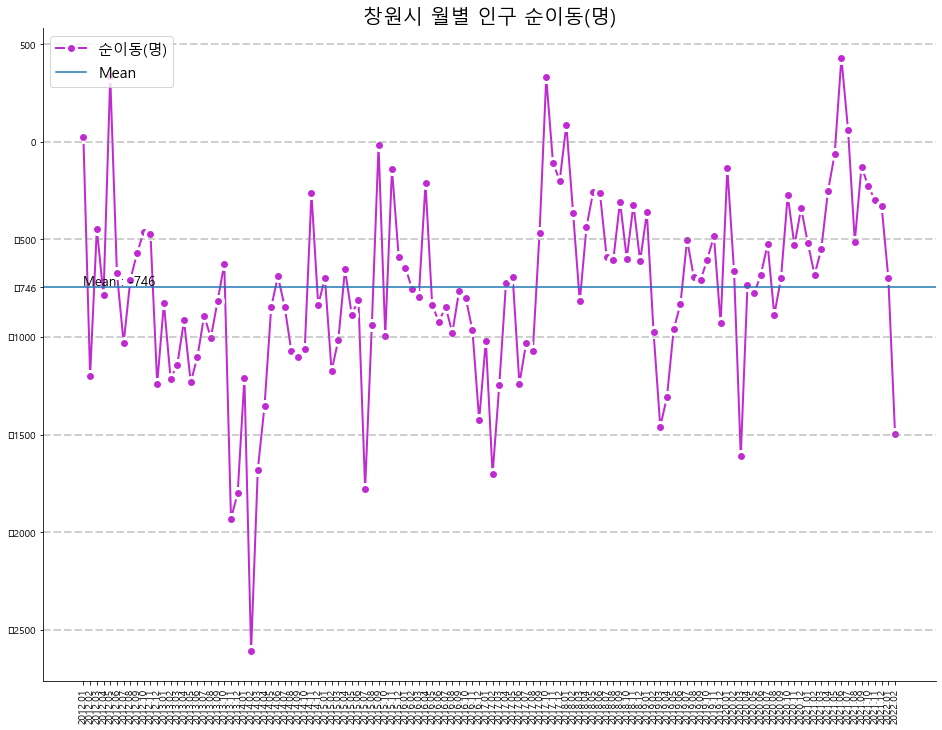

In [17]:
# 연속변수의 데이터 분포 확인
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐

mean = int(np.mean(df1['순이동(명)']))
 
fig = plt.figure(figsize=(16,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
 
args_plot = [df1['월별'], df1['순이동(명)']] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='#c02ad1', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
    marker='o', # 마커 모양
    markersize=10, # 마커 사이즈
    markeredgecolor='white', # 마커 테두리 색깔
    markeredgewidth=3, # 마커 테두리 두께
)

ax.plot(label='순이동(명)', *args_plot,**config_plot) ## 선그래프 생성 - 범례라벨 추가

ax.axhline(mean,label='Mean') ## 평균값을 y좌표로 하는 수평선 생성
ax.text(0,mean+10,f'Mean : {mean}',fontsize=13) ## 평균 매출 텍스트 출력
ylim = ax.get_ylim() ## 기존의 y축 범위를 저장
 
yticks = list(ax.get_yticks()) ## y축 눈금을 가져온다.

for y in yticks:
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5) ## 눈금선 생성


#평균값을 y 눈금에 추가한다.
yticks.append(mean) #평균값을 y 눈금에 추가한다.
yticks = sorted(yticks)

ax.set_yticks(yticks) ## 평균이 포함된 y눈금으로 새롭게 세팅한다.
ax.set_ylim(ylim) ## 기존의 y축 범위를 유지

ax.legend(loc='upper left', fontsize=15) ## 범례 생성
 
plt.xticks(rotation=90) ## x축 눈금 라벨 설정 - 45도 회전  
plt.title('창원시 월별 인구 순이동(명)',fontsize=20) ## 타이틀 설정
plt.show()

C:\Users\Bigdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bigdata\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


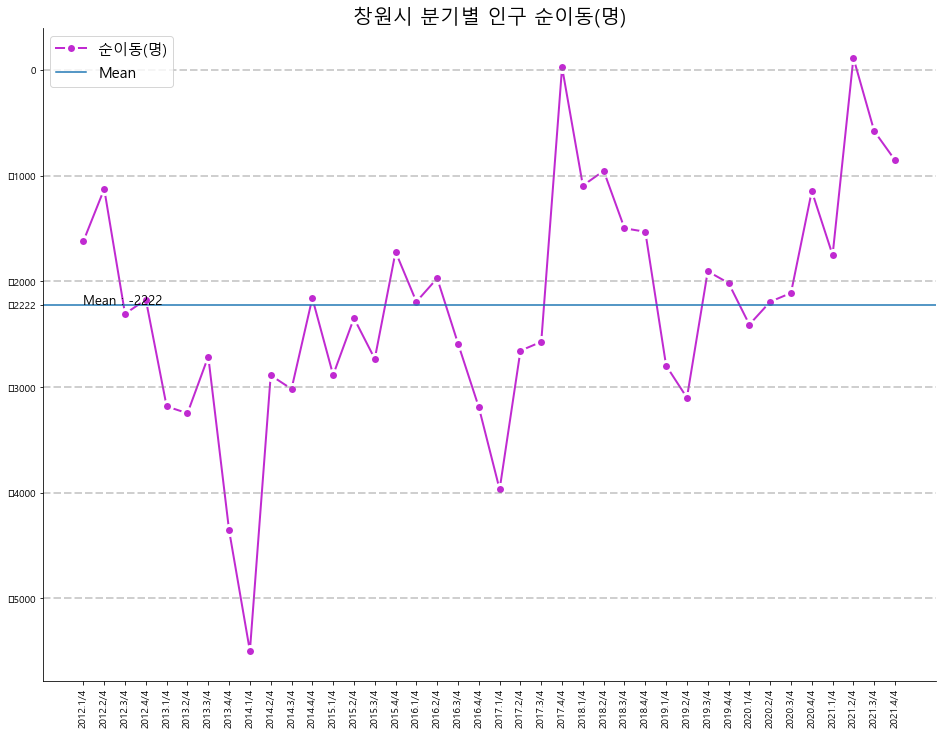

In [16]:
# 연속변수의 데이터 분포 확인
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐

mean = int(np.mean(df2['순이동(명)']))
 
fig = plt.figure(figsize=(16,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
 
args_plot = [df2['분기별'], df2['순이동(명)']] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='#c02ad1', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
    marker='o', # 마커 모양
    markersize=10, # 마커 사이즈
    markeredgecolor='white', # 마커 테두리 색깔
    markeredgewidth=3, # 마커 테두리 두께
)

ax.plot(label='순이동(명)', *args_plot,**config_plot) ## 선그래프 생성 - 범례라벨 추가

ax.axhline(mean,label='Mean') ## 평균값을 y좌표로 하는 수평선 생성
ax.text(0,mean+10,f'Mean : {mean}',fontsize=13) ## 평균 매출 텍스트 출력
ylim = ax.get_ylim() ## 기존의 y축 범위를 저장
 
yticks = list(ax.get_yticks()) ## y축 눈금을 가져온다.

for y in yticks:
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5) ## 눈금선 생성


#평균값을 y 눈금에 추가한다.
yticks.append(mean) #평균값을 y 눈금에 추가한다.
yticks = sorted(yticks)

ax.set_yticks(yticks) ## 평균이 포함된 y눈금으로 새롭게 세팅한다.
ax.set_ylim(ylim) ## 기존의 y축 범위를 유지

ax.legend(loc='upper left', fontsize=15) ## 범례 생성
 
plt.xticks(rotation=90) ## x축 눈금 라벨 설정 - 45도 회전  
plt.title('창원시 분기별 인구 순이동(명)',fontsize=20) ## 타이틀 설정
plt.show()

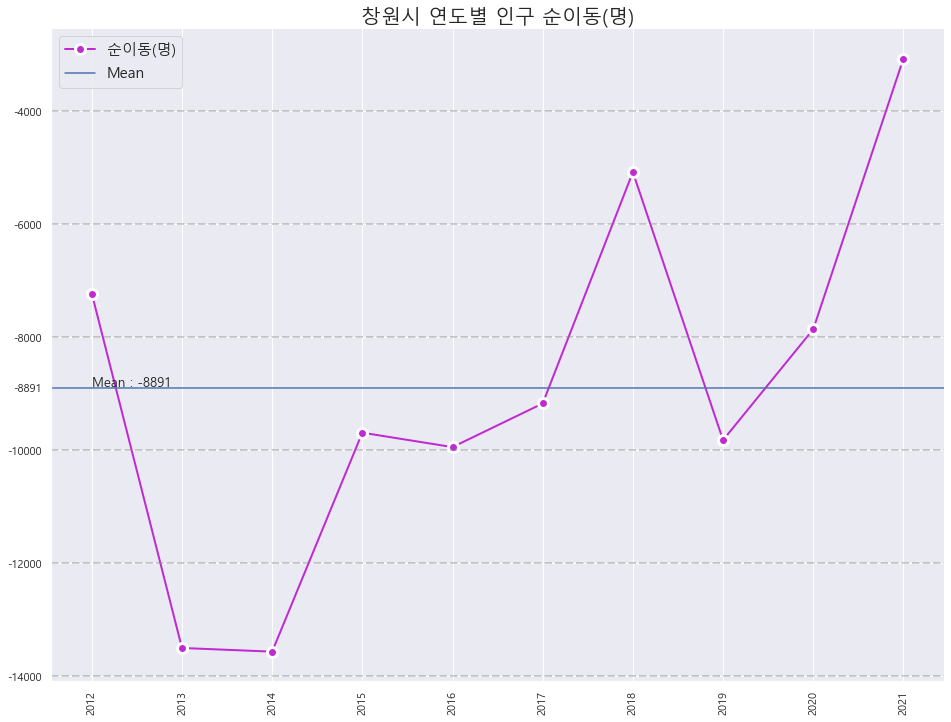

In [143]:
# 연속변수의 데이터 분포 확인
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐

mean = int(np.mean(df3['순이동(명)']))
 
fig = plt.figure(figsize=(16,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
 
args_plot = [df3['연도별'], df3['순이동(명)']] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='#c02ad1', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
    marker='o', # 마커 모양
    markersize=10, # 마커 사이즈
    markeredgecolor='white', # 마커 테두리 색깔
    markeredgewidth=3, # 마커 테두리 두께
)

ax.plot(label='순이동(명)', *args_plot,**config_plot) ## 선그래프 생성 - 범례라벨 추가

ax.axhline(mean,label='Mean') ## 평균값을 y좌표로 하는 수평선 생성
ax.text(0,mean+10,f'Mean : {mean}',fontsize=13) ## 평균 매출 텍스트 출력
ylim = ax.get_ylim() ## 기존의 y축 범위를 저장
 
yticks = list(ax.get_yticks()) ## y축 눈금을 가져온다.

for y in yticks:
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5) ## 눈금선 생성


#평균값을 y 눈금에 추가한다.
yticks.append(mean) #평균값을 y 눈금에 추가한다.
yticks = sorted(yticks)

ax.set_yticks(yticks) ## 평균이 포함된 y눈금으로 새롭게 세팅한다.
ax.set_ylim(ylim) ## 기존의 y축 범위를 유지

ax.legend(loc='upper left', fontsize=15) ## 범례 생성
 
plt.xticks(rotation=90) ## x축 눈금 라벨 설정 - 45도 회전  
plt.title('창원시 연도별 인구 순이동(명)',fontsize=20) ## 타이틀 설정

plt.show()

In [18]:
df3

,연도별,순이동(명),전년대비증감(증감률)
1,2012,-7226,-2201 (-43.8)
2,2013,-13497,-6271 (-86.8)
3,2014,-13562,-65 (-0.5)
4,2015,-9688,3874 (28.6)
5,2016,-9943,-255 (-2.6)
6,2017,-9171,772 (7.8)
7,2018,-5078,4093 (44.6)
8,2019,-9819,-4741 (-93.4)
9,2020,-7858,1961 (20.0)
10,2021,-3070,4788 (60.9)


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   연도별          10 non-null     object
 1   순이동(명)       10 non-null     int32 
 2   전년대비증감(증감률)  10 non-null     object
dtypes: int32(1), object(2)
memory usage: 280.0+ bytes
